In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy as spz
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import warnings
from scipy.interpolate import interp2d
warnings.filterwarnings("ignore")

In [3]:
# unit change
def D2K(Temperature): # Degree to Kelvin
    return Temperature + 273.15
def K2D(Temperature): # Kelvin to Degree
    return Temperature - 273.15
def cm2in(value):
    return value/2.54

# font
subplot_no = list(map(chr,range(97,123)))

# font
fs = 10
FS_label = fs+1
Axis_FS =fs-1
LEG_FS = fs-2
Annotation_FS = fs-0.5
case_name = ['Case A', 'Case B']

# unit change 
day_to_hour = 24
hour_to_min = 60
hour_to_sec = 3600
min_to_sec = 60  
cm2m = 1/100

# set timestep, duration
t_step = 10 # [s] 
pre_simulation_time = 60 # [h]
total_simulation_time = 168 # [h]
simulation_time = total_simulation_time - pre_simulation_time # [h]
t_row = int(total_simulation_time*hour_to_sec/t_step) # 시간 행
t_list = [t_step*i for i in range(t_row)] # 시간 행 리스트
time = pd.DataFrame(t_list)      #second
time_min = time/60;         #minute
time_hour = time/3600;      #hour
time_end = time_hour[-1:];    # last time

StartHour = 120
EndHour   = 144
resize_y0 = int(StartHour*hour_to_sec/t_step)
resize_y1 = int(EndHour*hour_to_sec/t_step)


#
T_init = D2K(20) 
T_BC1 = [(D2K(20 + 10*(math.sin(2*math.pi*n/(day_to_hour*hour_to_sec))))) for n in t_list] # [K]
T_BC2 = [(D2K(20)) for _ in t_list]

BC_L = T_BC1
BC_R = T_BC2
T0 = T_BC1

# k, C, alpha(0.25~5)x10^(-6)
alpha_unit = 10**(-6)
min_alpha = 0.2
max_alpha = 5
alpha_interval = 0.2
alpha = np.arange(max_alpha, (min_alpha-alpha_interval), -alpha_interval)

# Case A 
# VHC = [10**6 for _ in range(len(alpha))]10**6 # Volumetric Heat Cap      
# TC = [alpha[i]*VHC[i] for i in range(len(alpha))] # Thermal Conductivity
# CaseName = "DF_Error_rate_Case_A.csv"

# Case B
TC =  [1 for _ in range(len(alpha))]
VHC = [TC[i]/alpha[i] for i in range(len(alpha))]
CaseName = "Z.csv"

# length [cm]
min_length = 2
max_length = 50
length_interval = 2
length = np.arange(max_length*cm2m,(min_length-length_interval)*cm2m, -length_interval*cm2m)

divide_num = np.arange(min_length, max_length+length_interval, length_interval)

# Save dataframe
x = length
y = alpha
x_pos1, y_pos1 = np.meshgrid(x, y)

In [4]:
Z = pd.read_csv("PercentageError.csv")
Z.columns = [i for i in range(25)]

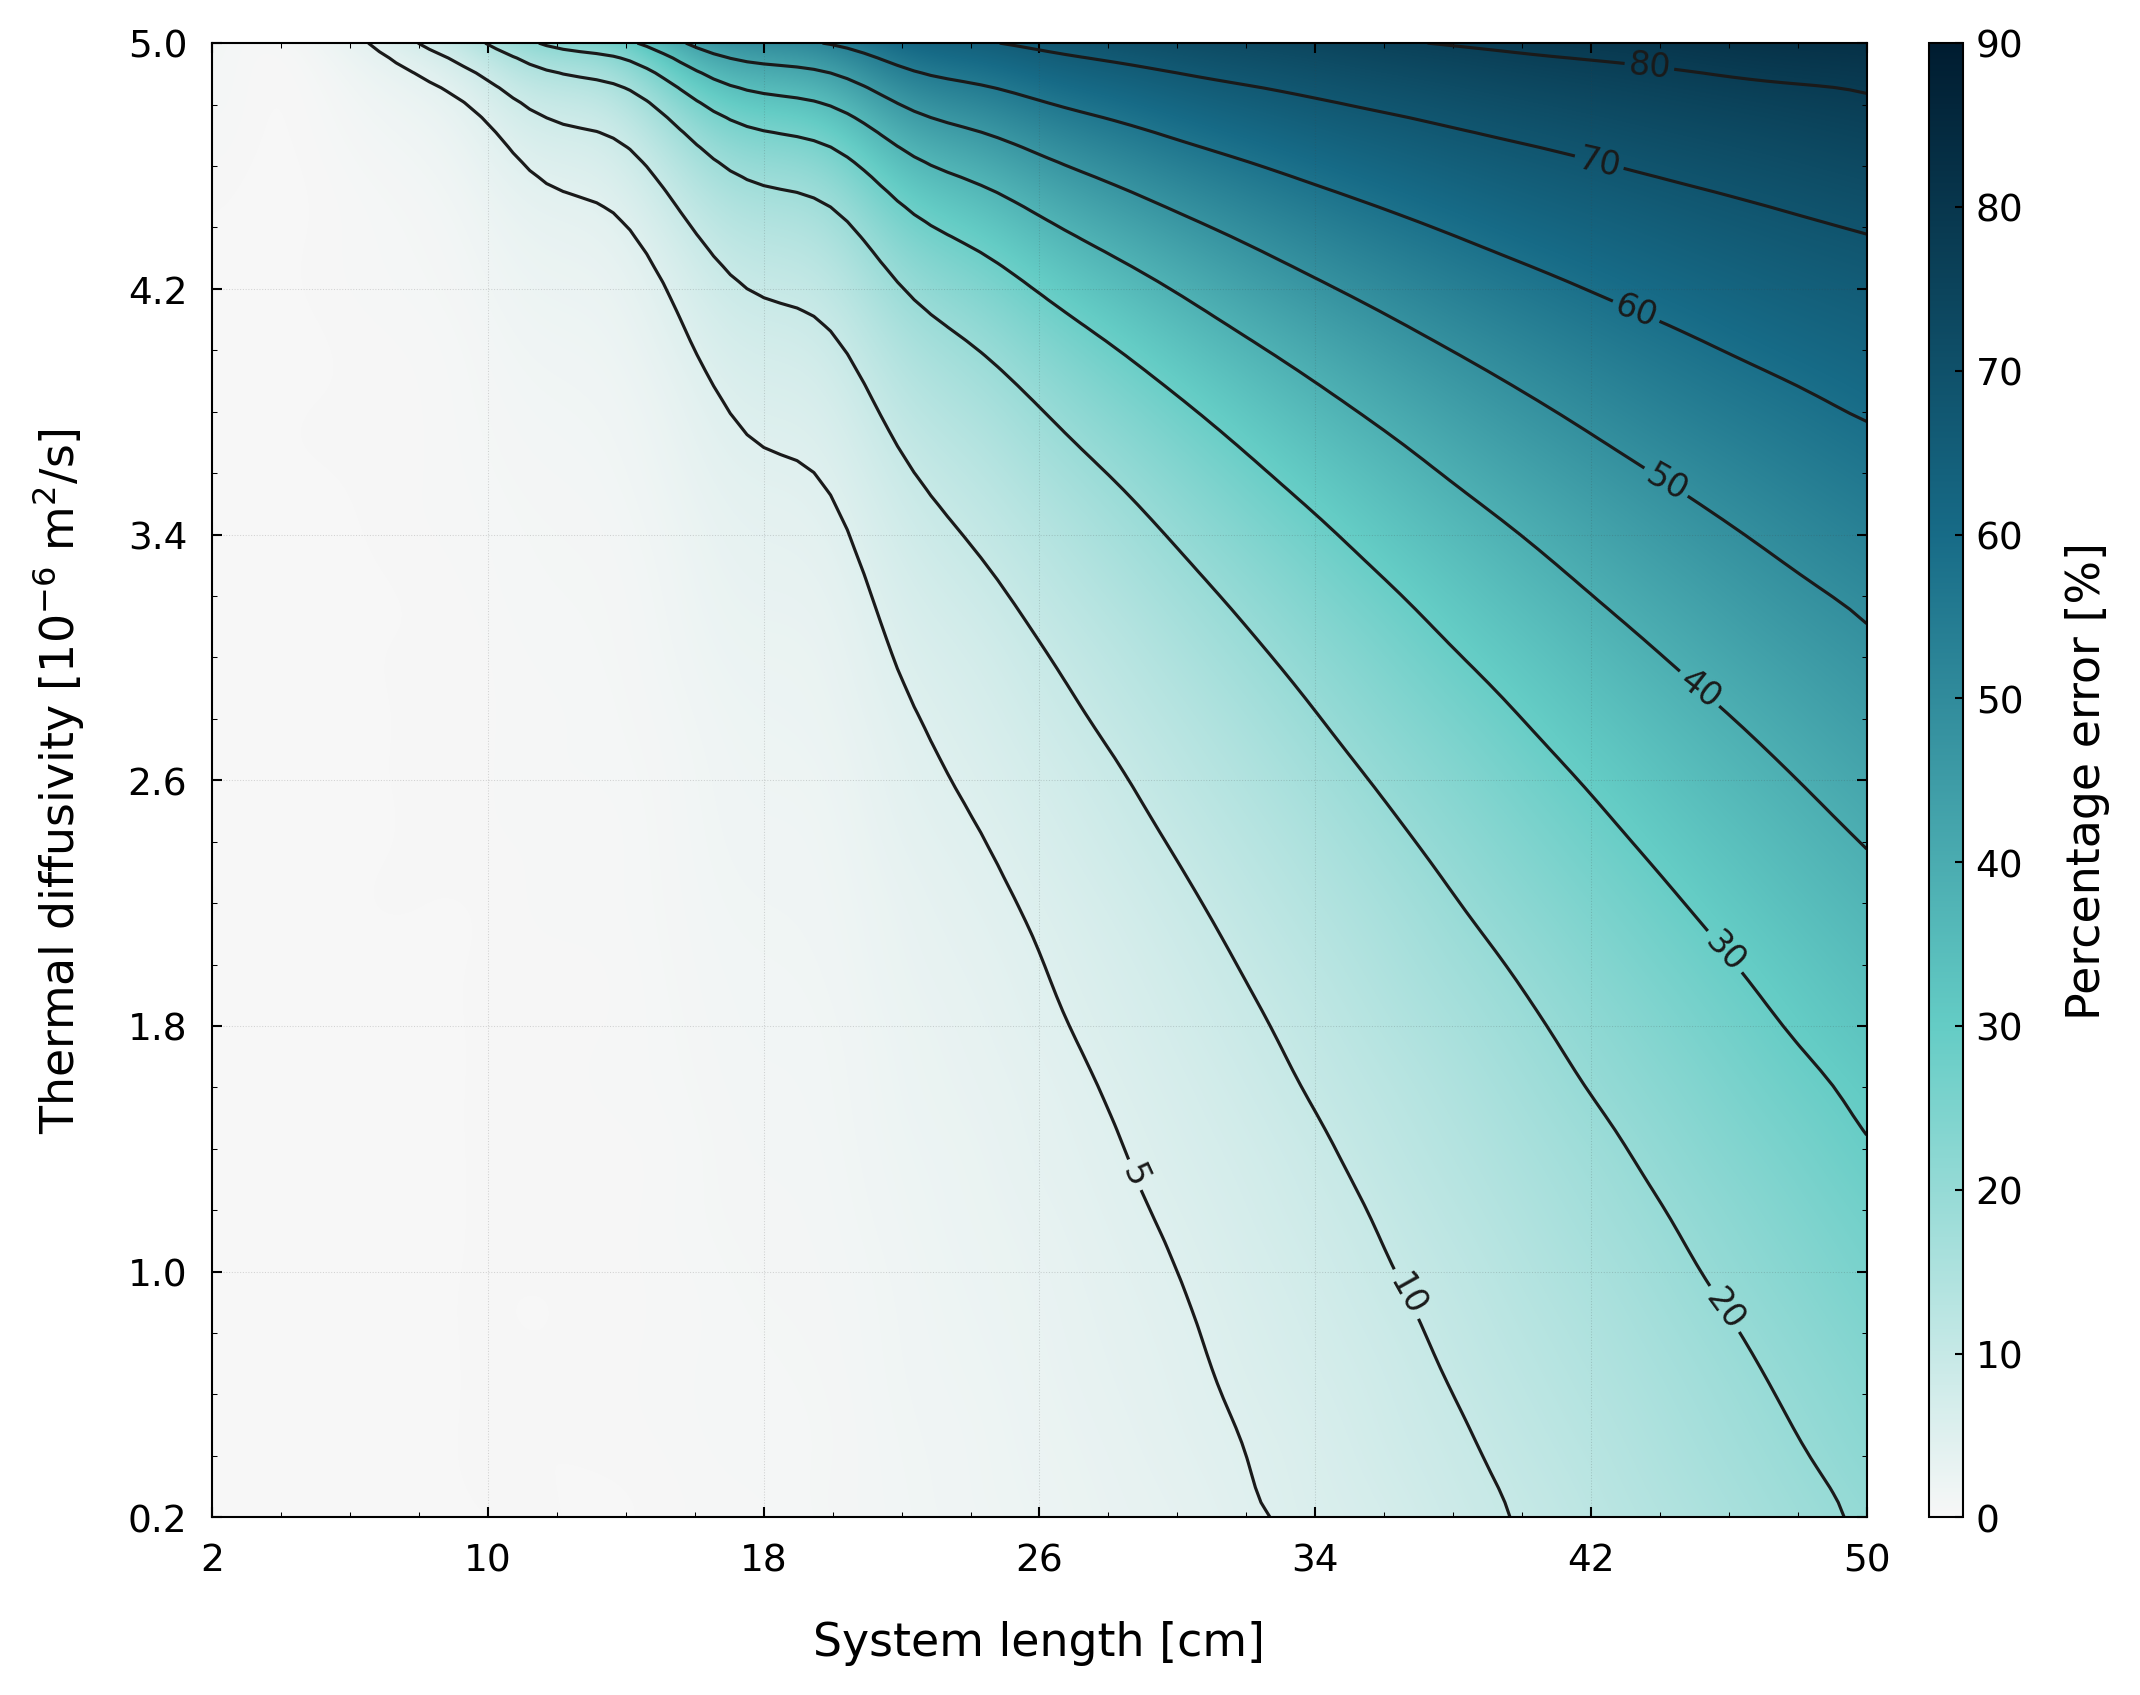

In [9]:
norm1 = mcolors.Normalize(vmin = 0, vmax = 90)
color_list = ['#F7F7F7','#64CCC5','#176B87', '#001C30'] 
cmap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', color_list, N=1000)

# subplot  
nrow = 1
ncol = 1
nfigs = nrow*ncol
fig, ax = plt.subplots(nrow, ncol, sharex=False, sharey=False, figsize=(cm2in(19),cm2in(15)), 
                        facecolor='w', edgecolor='k', squeeze=False, dpi = 300)

ef1 = ax[0,0].imshow(Z, aspect='auto', extent=[1,51,0.1,5.1], 
                     cmap=cmap1, norm=norm1, alpha=1.0, interpolation = "spline16" ) # Error field 
# ef2 = ax[0,1].imshow(DF_Error_rate_Case_B, aspect='auto', extent=[0+length_interval/2,50+length_interval/2,0+alpha_interval/2,5+alpha_interval/2], cmap=cmap1, norm=norm1, alpha=1.0,) # Error field

x = np.linspace(min_length,max_length,Z.shape[0])
y = np.linspace(min_alpha,max_alpha,Z.shape[1])

# 보간 함수 생성
f = interp2d(x, y, Z, kind='quintic')

# 더 세밀한 그리드 생성
x = np.linspace(x.min(), x.max(), 100)
y = np.linspace(y.max(), y.min(), 100)

Z =f(x,y)

xmin = [2]*nfigs
xmax = [50]*nfigs
xint = [length_interval*5]*nfigs
xmar = [0]*nfigs

ymin = [0.2]*nfigs
ymax = [5]*nfigs 
yint = [alpha_interval]*nfigs
ymar = [0 for i in range(nfigs)] # yint[i]/6


# figure settings 
for ridx in range(nrow):
    for cidx in range(ncol):
        idx = ridx*ncol + cidx

        ax[ridx,cidx].set_xlabel('System length [cm]', fontsize=FS_label,labelpad=10)
        # ax[ridx,cidx].xaxis.set_label_coords(0.5, -0.09)
        ax[0,0].set_ylabel('Thermal diffusivity [10$^{-6}$ m$^2$/s]', fontsize=FS_label,labelpad=10)
        # ax[ridx,cidx].yaxis.set_label_coords(-0.1, 0.5)

        ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', length=2.5, width=0.5 ,  right=True,top=True ,pad=6)
        ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', length=1.25, width=0.25, right=True,top=True ,pad=6)

        # xlim ylim 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])     
        
        # ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx]))
        xtick = np.arange(min_length, max_length+length_interval, length_interval*4).tolist()
        ytick = np.arange(min_alpha, max_alpha+alpha_interval, alpha_interval*4).tolist()

        ax[ridx,cidx].set_xticks([round(xtick[i],2) for i in range(len(xtick))]) 
        ax[ridx,cidx].set_yticks([round(ytick[i],2) for i in range(len(ytick))])
        
        # replace xtick string 
        xtick_list = ax[ridx,cidx].get_xticks().tolist()
        ax[ridx,cidx].set_xticklabels(xtick_list)
        ytick_list = ax[ridx,cidx].get_yticks().tolist()
        ax[ridx,cidx].set_yticklabels(ytick_list)
        
        # number of minor ticks
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))

        # grid
        ax[ridx,cidx].grid(True, axis='both', linestyle=':', linewidth=0.25, color='0.25', alpha = 0.2); 
        # subplot
        subplot_idx = '('+subplot_no[idx]+') ' + case_name[idx] #(a) + Internal
        #ax[ridx,cidx].annotate(subplot_idx, xy=(.01, 1.03), xycoords='axes fraction',
            #horizontalalignment='left', verticalalignment='top', fontsize=fs) 
                 
        # spine line width  
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.5)
                ax[ridx,cidx].spines[k].set_color('k')         

# 등고선 그리기
contour_levels = [5]+ [10*(i+1) for i in range(8)]
contour = plt.contour(x, y, Z, levels=contour_levels, colors='0.1', linewidths=0.75, linestyles='-')
plt.clabel(contour, fontsize=fs-2)
plt.tight_layout(pad = 1.7)
fig.subplots_adjust(right=0.85, bottom=0.12) # make space for additional colorbar

# colorbar
cbar_width =  0.015 #vertical  
cbar_height = 0.015 #horizontal  
cbar_dist_v = 0.085; # vertical colorbar distance from bbox edge
cbar_dist_h = 0.028; # horizontal colorbar distance from bbox edge

# horizontal colorbars 
# colorbar1 temperature 
bbox1 = ax[0,0].get_position() # get the normalized axis original position 
cb_ax1 = fig.add_axes([bbox1.x1+cbar_dist_h, bbox1.y0, cbar_width, bbox1.y1-bbox1.y0]) #[x_origin, y_origin, width, height]
cbar1  = fig.colorbar(ef1, cax=cb_ax1, ax=ax[0,0], orientation='vertical') 
cbar1.ax.tick_params(direction='in',labelsize=Axis_FS, length=2, width=0.5, pad=3)
cbar1.ax.minorticks_off()
cbar1.locator = ticker.MultipleLocator(10)
cbar1.ax.set_ylabel('Percentage error [%]', rotation=90, fontsize=FS_label, labelpad=10)
cbar1.outline.set_linewidth(0.5)

figname = 'Fig2 Percentage error Comparison'
# plt.savefig(figname+'.svg', dpi=600)
# plt.savefig(figname+'.png', dpi=600)
# plt.savefig(figname+'.pdf', dpi=600)

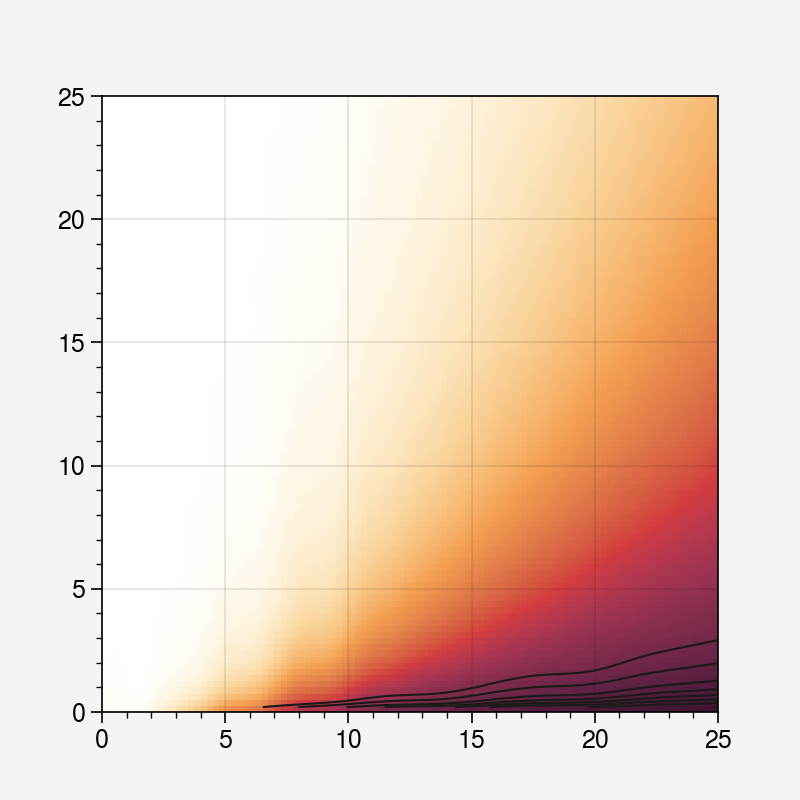

In [ ]:
plt.imshow(Z)
f = interp2d(x, y, Z, kind='quintic')
x1 = np.linspace(x.min(), x.max(), 100)
y1 = np.linspace(y.max(), y.min(), 100)
Z1 =f(x1,y1)
plt.contour(x1, y1, Z1, levels=contour_levels, colors='0.1', linewidths=0.75, linestyles='-')
plt.imshow(Z1,extent=[0,25,0,25])

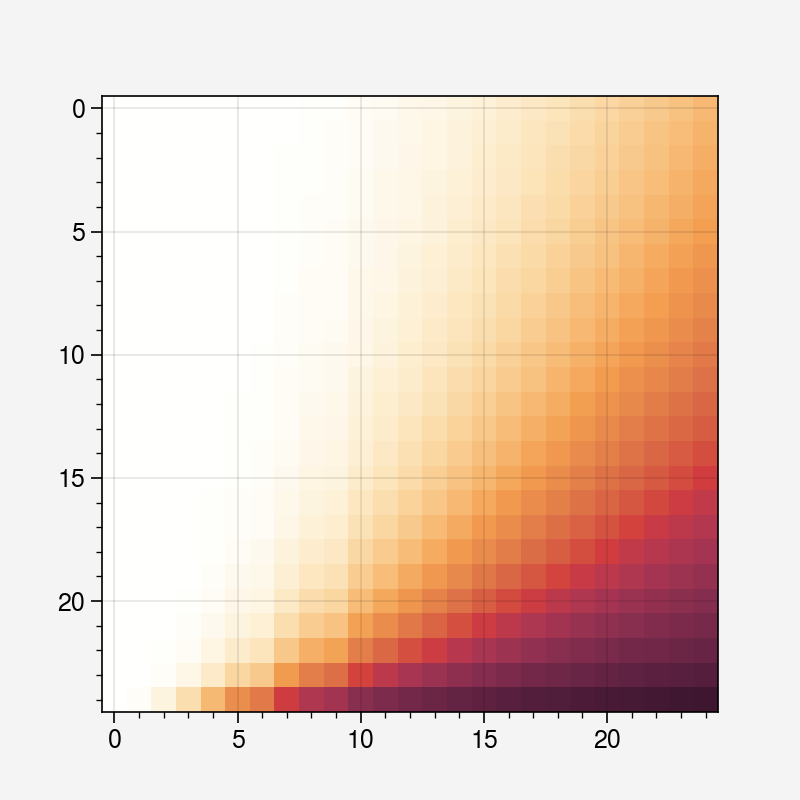

In [50]:
plt.imshow(Z)

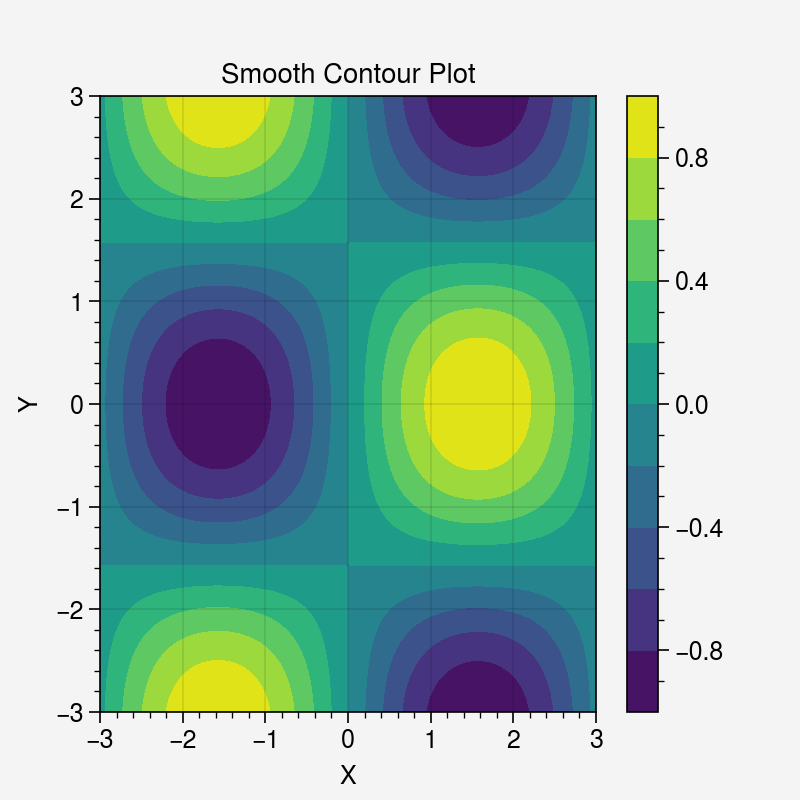

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# 등고선 플롯 그리기
plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar()  # 컬러바 추가
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Contour Plot')
plt.show()
